https://www.kaggle.com/uciml/student-alcohol-consumption

Secondary school students (Links to an external site.): predict the variable romantic (has a romantic interest). Use the file student-por.csv, not the other one.

In [92]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn as sk
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# K-NN, K-nearest neighbors

Explain briefly in your own words how the algorithm works:

The K-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm. KNN calculates the distance of a new data point to all other training data points. It selects the K-nearest data points, where K can be any integer. After that it assigns the data point to the group to which the majority of the K data points belong.

In [93]:
df = pd.read_csv('student-por.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


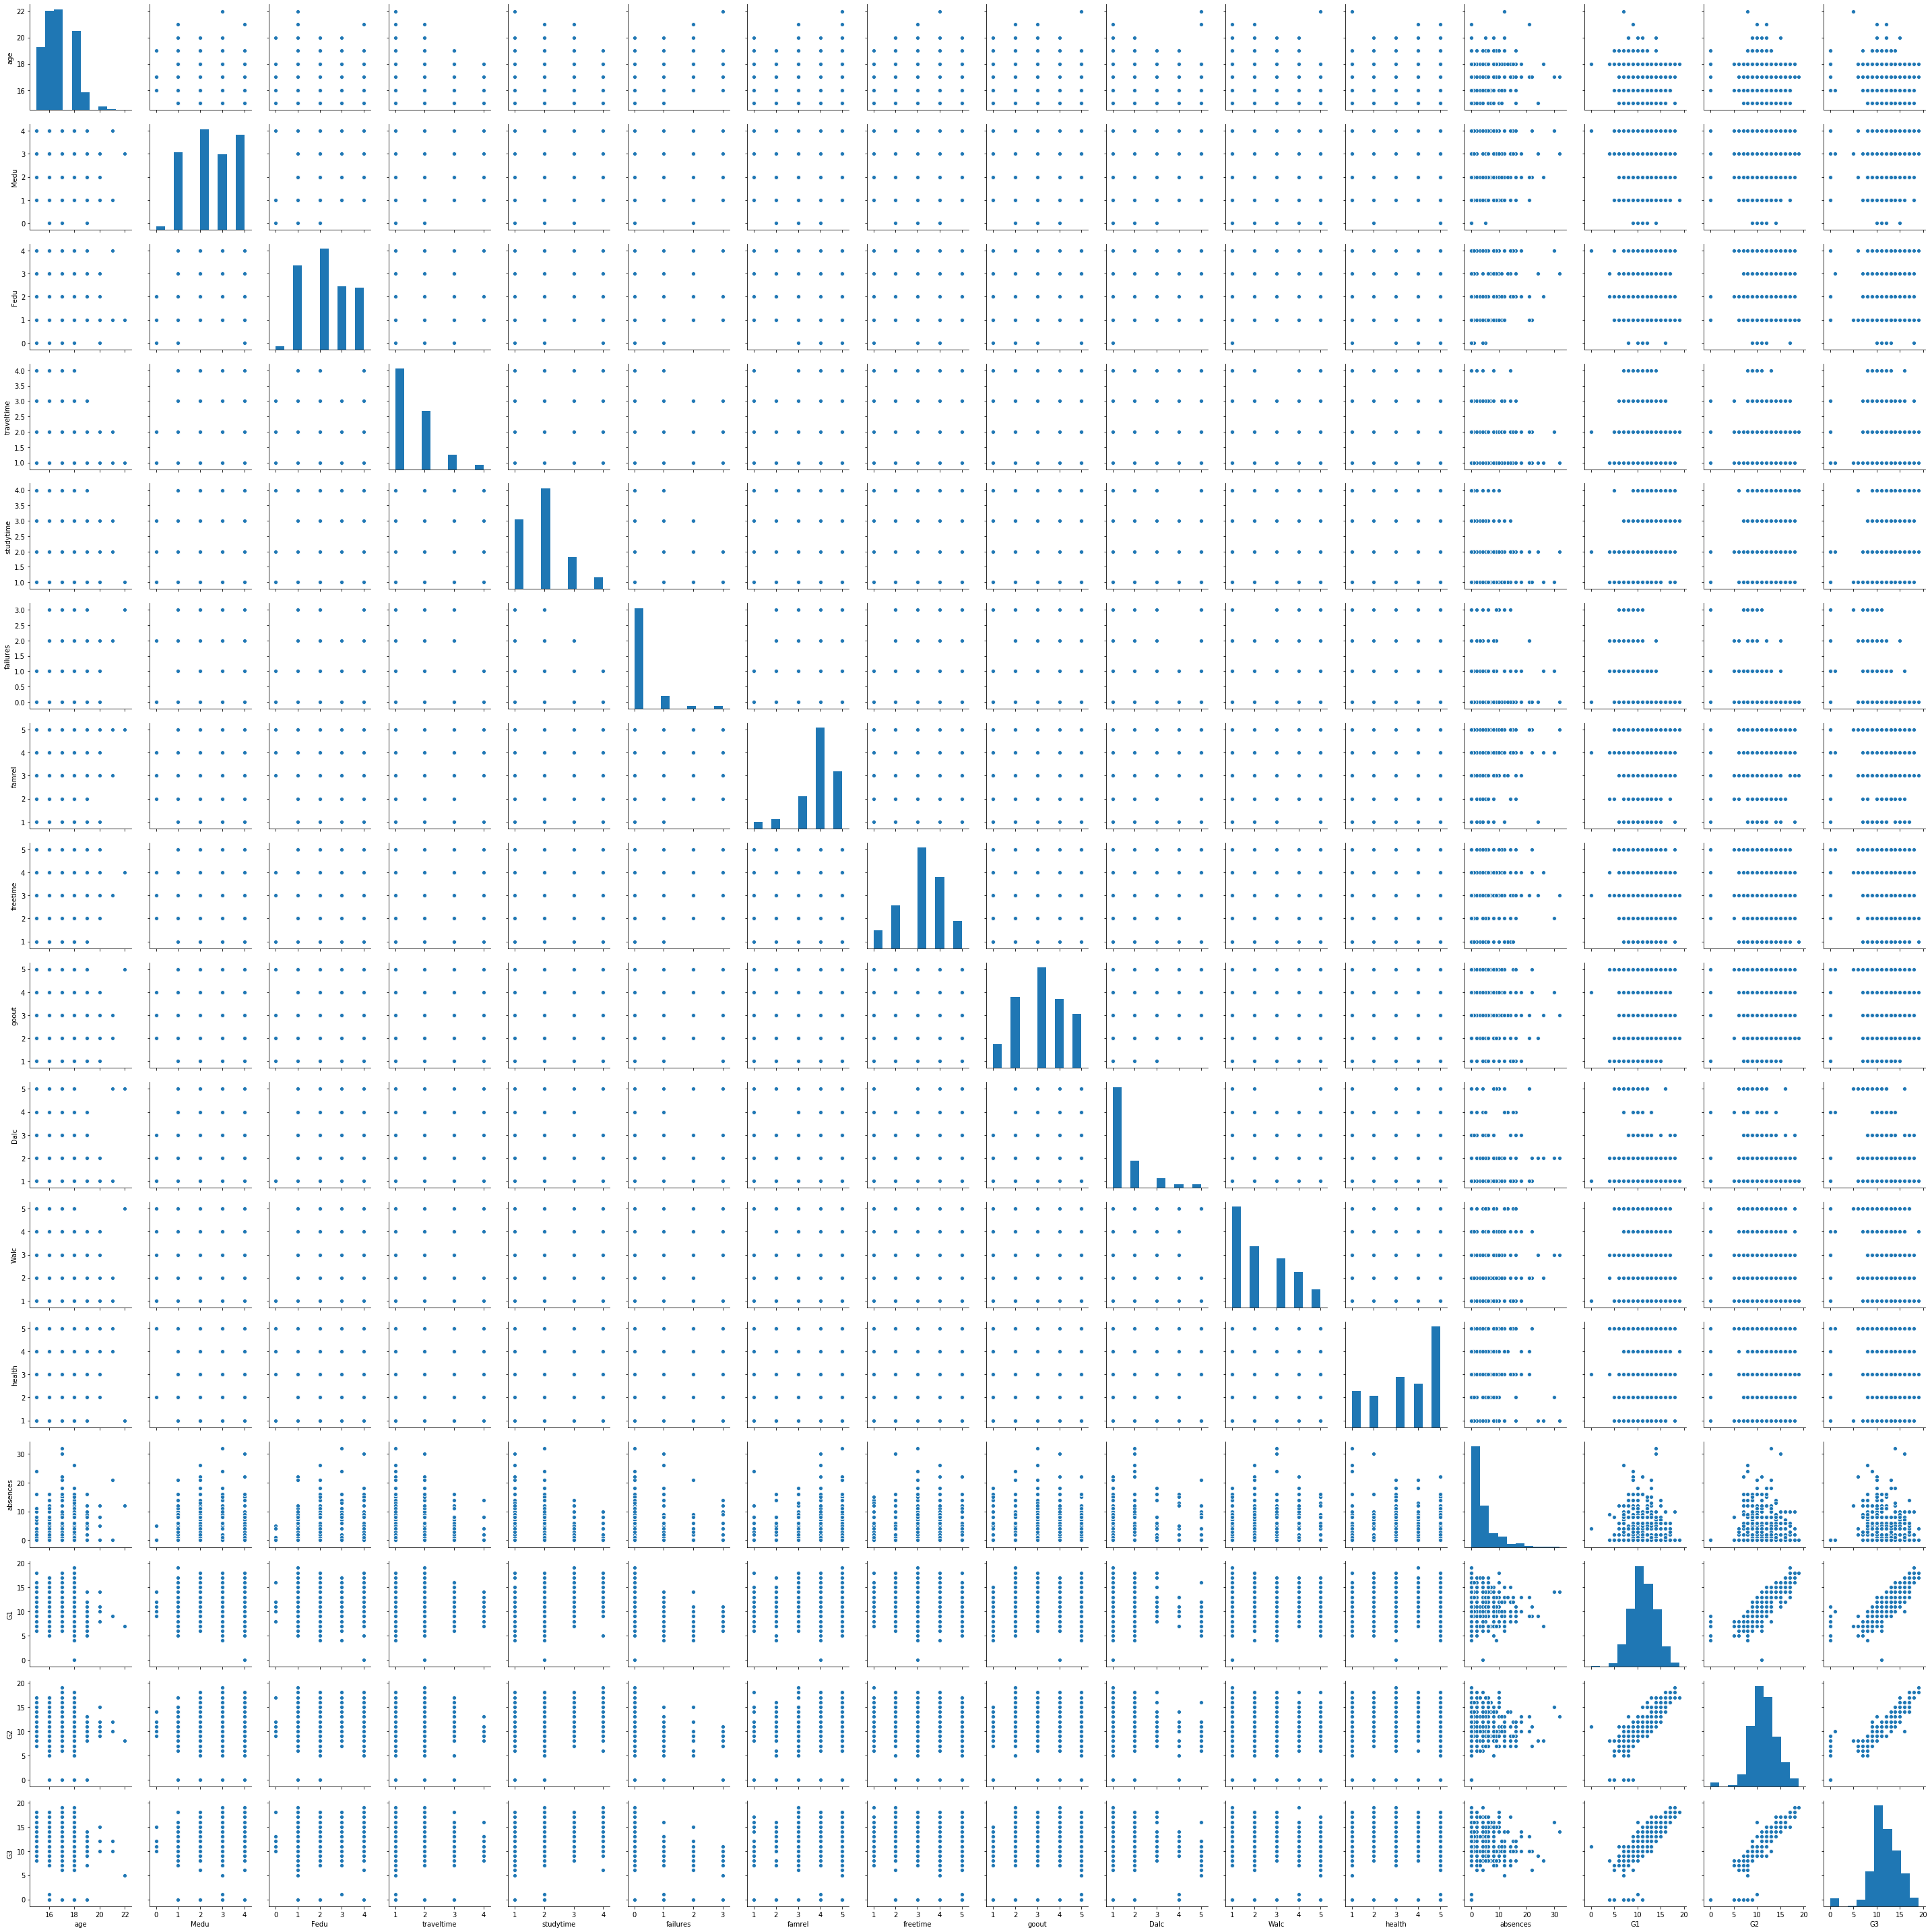

In [105]:
sns.pairplot(df)
plt.show()

In [95]:
dummies = pd.get_dummies(df['sex'])
df_dummies = pd.concat([df, dummies], axis=1)
df_dummies.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,F,M
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1,0


In [96]:
df_subset0 = df_dummies[["Walc", "Dalc", "goout", "F", "age", "freetime", "paid", "health", "absences", "G1", "romantic"]]
df_subset0.head()

,Walc,Dalc,goout,F,age,freetime,paid,health,absences,G1,romantic
0,1,1,4,1,18,3,no,3,4,0,no
1,1,1,3,1,17,3,no,3,2,9,no
2,3,2,2,1,15,3,no,3,6,12,no
3,1,1,2,1,15,2,no,5,0,14,yes
4,2,1,2,1,16,3,no,5,0,11,no


In [98]:
dummies2 = pd.get_dummies(df_dummies['paid'], prefix='paid')
df_dummies2 = pd.concat([df_dummies, dummies2], axis=1)
df_dummies2.head(5)

,Walc,Dalc,goout,F,age,freetime,paid,health,absences,G1,romantic,rom_no,rom_yes,paid_no,paid_yes
0,1,1,4,1,18,3,no,3,4,0,no,1,0,1,0
1,1,1,3,1,17,3,no,3,2,9,no,1,0,1,0
2,3,2,2,1,15,3,no,3,6,12,no,1,0,1,0
3,1,1,2,1,15,2,no,5,0,14,yes,0,1,1,0
4,2,1,2,1,16,3,no,5,0,11,no,1,0,1,0


In [99]:
df_subset = df_dummies3[["Walc", "Dalc", "goout", "F", "age", "freetime", "paid_yes", "health", "absences", "G1", "romantic"]]
df_subset = df_subset.dropna()
df_subset.head()

,Walc,Dalc,goout,F,age,freetime,paid_yes,health,absences,G1,romantic
0,1,1,4,1,18,3,0,3,4,0,no
1,1,1,3,1,17,3,0,3,2,9,no
2,3,2,2,1,15,3,0,3,6,12,no
3,1,1,2,1,15,2,0,5,0,14,yes
4,2,1,2,1,16,3,0,5,0,11,no


# Split the data set into a training and test set

In [100]:
df_subset1 = df_subset[["Walc", "goout", "F", "age", "freetime", "paid_yes", "health", "absences", "G1"]]


X = df_subset1 #create the X matrix
X = normalize(X)
y = df_subset['romantic'] #create the y-variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

# Train the model

In [101]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.6

60% of movies is predicted accurately. 

# Evaluate the predictive performance of your model on the test set

In [102]:
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[98, 30],
       [48, 19]])

In [103]:
y_test.value_counts() # test which value is what in the coef matrix

no     128
yes     67
Name: romantic, dtype: int64

In [104]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['In relationship', 'Single'], columns = ['In relationship (predicted)', 'Single (predicted)']) 
conf_matrix

,In relationship (predicted),Single (predicted)
In relationship,98,30
Single,48,19



The way to read this is that of people in a relationship, 98 are correctly predicted as 'in a relationship', 30 are instead predicted as 'single' instead. 

The recall and precision for people in a relationship is:

$recall = \frac{98}{98 + 30} = .76$

$precision = \frac{98}{98 + 19} = .83$